## 3: Week3 - Machine learning - Classification

### Problem context
Data used for this exercise is from a Telecommunications(Telco) Provider regarding churn rate (customers who are leaving the service provider).

The data comprises of various information about the customers and whether they left or stayed (represented by the churn column).

Task is to create a machine learning model to predict whether the customer will churn or not churn (churn prediction). Thus this is a binary classification problem. 

### 3.1 Data Preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

#### Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Load data

##### Multiple ways to load data (choose to your liking - by uncommenting the code)

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* Data can also be downloaded from https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [2]:
#Method 1:

#This will run shell commands to check if file already exists (from previous download), only if it does not, it will download
#Using ! tells Jupyter notebook/python code that this is a shell command to be executed on the underlying machine and not a python command
#Using -O filename with wget, you can save the file with a different filename

#Code below
# filename = "telco-churn.csv"
# url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv -O telco-churn.csv"
# !if [[ ! -f $filename ]] ; then echo "downloading file" ; wget $url -O $filename ; else echo "file exists" ; fi

In [3]:
#Method 2:

#Using python os library, this will check if file exists, if not will download

#Code below
# import os
# filename = "telco-churn.csv"
# url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv -O telco-churn.csv"
# if not os.path.isfile(filename):
#     !wget $url -O $filename

In [4]:
#Method 2:

#In Pandas, you can directly read the data from the URL.

#Code below

#df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv -O telco-churn.csv')

In [5]:
#Method 3:

#You can download the csv file into your notebook (if you will be working on this notebook several times, you would prefer to download for once)

#Code below

# !wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv -O telco-churn.csv

In [6]:
df = pd.read_csv('telco-churn.csv')

In [7]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


#### Standardize data

Make all column names lower case and replace spaces with _

Similarly apply the same data processing to the actual data in the object columns to make data representation uniform

In [8]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [9]:
object_cols = list(df.dtypes[df.dtypes == 'object'].index)
object_cols

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [10]:
for col in object_cols:
    df[col] = df[col].str.lower().str.replace(' ','_')
df.head(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [11]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [12]:
df.seniorcitizen.value_counts()

0    5901
1    1142
Name: seniorcitizen, dtype: int64

We can see that the seniorcitizen is actually categorical column with 2 categories - 0, 1. However since 0 and 1 are numbers, the column got marked as int64.

In [13]:
df.totalcharges.head(10)

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: totalcharges, dtype: object

We can also see that totalcharges is a numerical column, but seems to be marked as object due to some reason (which we will see in a bit)

In [18]:
#We will use pd.to_numeric which takes a series and converts it into numerical format
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

We get an error stating that the string _ cannot be be converted into number at position (row number) 488. Let us look at the row

In [ ]:
df['totalcharges'][488]

What happened was that the original data in column totalcharges possibly had spaces (maybe where data from customer was not available) and when we did data preparation and replaced space with _ this issue got introduced. So now we will have to handle these entries.

In pd.to_numeric we can use errors='coerce' to tell pandas to set invalid parsing as NaN.
[Document Reference](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_numeric.html)

In [ ]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
df[tc.isnull()][['totalcharges']]

Let us update our original dataframe df with this

In [19]:
df['totalcharges'] = pd.to_numeric(df.totalcharges, errors='coerce')

In [20]:
df['totalcharges'].isnull().sum()

11

Using the errors='coerce' handled the values where parsing to numeric failed by filling those values with NaNs. Let us now fill these missing values with 0. This may not be the best way to handle missing values since total charges will not be 0, however lets use that since its simple and convenient.

In [21]:
df['totalcharges'] = df['totalcharges'].fillna(0)

Now let us look at the column churn

In [22]:
df['churn']

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

When using the data for machine learning, we need to convert data into numerical. Let us convert yes and no to 1 and 0

In [23]:
df['churn'] = (df['churn'] == 'yes').astype(int)
df['churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

### 3.2 Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In this exercise, we will use train_test_split from the scikit-learn library (sklearn) to do data split for our train/validation/test as 60%:20%:20%.

Since train_test_split can split data into 2 parts only, whereas we want 3 parts, we will do the split 2 times
1. Split df into df_full_train (df_train + df_val) , df_test (with 80% : 20% split)
2. Split df_full_train into df_train , df_val (with 75% : 25% split of full_train - since

In [24]:
print("Total : ",df.shape[0])
print("Final split we want : ", "train:",round(df.shape[0]*0.6), "/ val:",round(df.shape[0]*0.2), "/ test:",round(df.shape[0]*0.2))
print("Step 1 split : ", "full_train(train+val):",round(df.shape[0]*0.8), "/ test:",round(df.shape[0]*0.2))
print("Step 2 split : ", "train:",round(df.shape[0]*0.8*0.75), "/ val:",round(df.shape[0]*0.8*0.25))

Total :  7043
Final split we want :  train: 4226 / val: 1409 / test: 1409
Step 1 split :  full_train(train+val): 5634 / test: 1409
Step 2 split :  train: 4226 / val: 1409


In [25]:
# Using ? at the end of the function will provide help. Uncomment below to get help
# train_test_split?

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1)

In [28]:
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [29]:
print(df_train.shape[0], df_val.shape[0], df_test.shape[0])

4225 1409 1409


In [30]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [31]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [32]:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [33]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3.4 EDA

* Check missing values
* Look at the target variable (churn)
* Look at numerical and categorical variables

In [34]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [35]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Let us have a look at the distribution of the churn variable

In [36]:
#Using normalize=True we get the percentage
df_full_train['churn'].value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

The global churn rate is 26.537%. Since churn has values 0's and 1's only, we can also calculate the percentage of 1's using the mean()

In [37]:
df_full_train['churn'].mean()

0.26996805111821087

In [38]:
global_churn_rate = df_full_train['churn'].mean()
round(global_churn_rate,2)

0.27

In [39]:
df_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
dtype: object

In [40]:
numerical_cols = ['tenure','monthlycharges','totalcharges']

In [41]:
df_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

In [42]:
categorical_cols = ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 
                    'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup',
                    'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 
                    'contract', 'paperlessbilling','paymentmethod']

In [43]:
df_train[categorical_cols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Feature importance - churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable
* Churn rate
* Risk ratio

Let us look at the churn rate within different groups

In [44]:
churn_female = df_full_train[df_full_train['gender'] == 'female']['churn'].mean()
churn_female

0.27682403433476394

In [45]:
churn_male = df_full_train[df_full_train['gender'] == 'male']['churn'].mean()
churn_male

0.2632135306553911

In [46]:
global_churn_rate

0.26996805111821087

So, the churn rate is almost similar irrepective of the gender and is close to our global churn rate

In [47]:
df_full_train['partner'].value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [48]:
churn_partner = df_full_train[df_full_train['partner'] == 'yes']['churn'].mean()
churn_partner

0.20503330866025166

In [49]:
churn_no_partner = df_full_train[df_full_train['partner'] == 'no']['churn'].mean()
churn_no_partner

0.3298090040927694

Thus, we can see that whether the customer has a partner or not seems to have bearing on whether the customer is likely to churn or not. Thus partner feature is more important than the gender feature.

One way to see at the feature importance is to see the difference between the global_churn_rate and groupwise churn rate. And if difference > 0, then the customer is more likely to churn, if difference < 0 then less likely to churn.

While, another way is to look at the ration of group wise churn rate / global churn rate (**This is also termed as risk ratio**). If the ration > 1, then the customer is more likely to churn, if ratio < 1 then less likely to churn.

$Risk\_ratio=\frac{group\_churn}{global\_churn}$

In [50]:
global_churn_rate - churn_partner, global_churn_rate - churn_no_partner

(0.06493474245795922, -0.05984095297455855)

In [51]:
churn_partner / global_churn_rate, churn_no_partner/global_churn_rate

(0.7594724924338315, 1.2216593879412643)

Let us now look at a different method to get these results into a single view

In [52]:
df_group = df_full_train.groupby('gender')['churn'].agg(['mean','count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [53]:
from IPython.display import display

In [54]:
for c in categorical_cols:
    df_group = df_full_train.groupby(c)['churn'].agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    print(c)
    display(df_group)
    print('\n'*2)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980





seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208





partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472





dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651





phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412





multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948





internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201





onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570





onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660





deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480





techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390





streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328





streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182





contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730





paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560





paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


### 3.6 Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

https://en.wikipedia.org/wiki/Mutual_information

We will look at mutual information with categorical features

In [55]:
from sklearn.metrics import mutual_info_score

In [56]:
mutual_info_score(df_full_train['contract'],df_full_train['churn'] )

0.0983203874041556

In [57]:
mutual_info_score(df_full_train['gender'],df_full_train['churn'] )

0.0001174846211139946

In [58]:
mutual_info_score(df_full_train['partner'],df_full_train['churn'] )

0.009967689095399745

Thus we can see from above that contract is more important than gender, partner is more importance than gender but less important than contract

In [59]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train['churn'])

In [60]:
df_full_train[categorical_cols].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [61]:
mi = df_full_train[categorical_cols].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### 3.7 Feature importance: Correlation

How about numerical columns?

Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [62]:
df_full_train[numerical_cols]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


We can see the correlation coefficient between 2 numerical features using corrwith method

In [63]:
df_full_train[numerical_cols].corrwith(df_full_train['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Negative correlation coefficient means as the value of one variable increases the value of the other decreases. In the above example - as tenure increases, the customer is less likely to churn, while as monthlycharges increase, the customer is more likely to churn

In [64]:
df_full_train[df_full_train['tenure'] <= 2]['churn'].mean()

0.5953420669577875

In [65]:
df_full_train[(df_full_train['tenure'] > 2) & (df_full_train['tenure'] <= 12)]['churn'].mean()

0.3994413407821229

In [66]:
df_full_train[df_full_train['tenure'] > 12]['churn'].mean()

0.17634908339788277

### 3.8 One hot encoding

Use Scikit-Learn to encode categorical features using One hot encoding

We will use DictVectorizer from sklearn which converts dictionary into a vector. i.e. a dictionary of feature-value combination to one hot encoded matrix. The advantage of DictVectorizer over get_dummies method is that it is alright if you even pass numerical features to it. DictVectorizer recognises numerical features and keeps them as they are, while one hot encoding categorical features.

In [67]:
from sklearn.feature_extraction import DictVectorizer

In [68]:
#Following creates a dictionary as per columns
df_train[['gender','contract']].iloc[:20].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female',
  10: 'female',
  11: 'male',
  12: 'female',
  13: 'female',
  14: 'female',
  15: 'male',
  16: 'female',
  17: 'female',
  18: 'male',
  19: 'male'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month',
  10: 'two_year',
  11: 'month-to-month',
  12: 'two_year',
  13: 'month-to-month',
  14: 'month-to-month',
  15: 'month-to-month',
  16: 'two_year',
  17: 'month-to-month',
  18: 'one_year',
  19: 'two_year'}}

In [69]:
#To create a dictionary as per rows, use orient='records'
df_train[['gender','contract']].iloc[:20].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'}]

In [70]:
dicts = df_train[['gender','contract']].iloc[:20].to_dict(orient='records')

In [71]:
dv = DictVectorizer()

In [72]:
#We use fit method with the values in dicts so that the DictVectorizer understands that these are the keys and possible values (the columns and their possible values)
dv.fit(dicts)

#Then we use the transform method to then convert the dict to vector form
dv.transform(dicts)

<20x5 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

By default this creates a sparse matrix [to have data stored in compressed format, since most of the values will be 0's]. However we want to have the one hot encoding of the variable values, so we choose not to use sparse

In [73]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.]])

In [74]:
#To get the feature names for the one hot encoded columns
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

One hot encoding is done for categorical features only, so we pass only categorical features to DictVectorizer. However DictVectorizer is smart enough to understand if there are any numerical columns and does not do any encoding for them but keeps their values as it is

In [75]:
dicts = df_train[['gender','contract','tenure']].iloc[:20].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.]])

In [76]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [77]:
train_dicts = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
list(dv.transform(train_dicts)[:5][0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [78]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [79]:
train_dicts = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [80]:
val_dicts = df_val[categorical_cols + numerical_cols].to_dict(orient='records')
X_val = dv.transform(val_dicts)

### 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

Linear regression

```y = w0 + wT.X```

Logistic regression

```y = sigmoid(w0 + wT.X)```

In [81]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

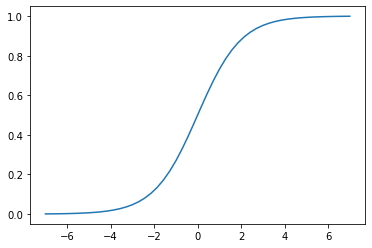

In [82]:
z = np.linspace(-7,7,50)
plt.plot(z,sigmoid(z))

In [83]:
def linear_regression(xi):
    result = w0
    
    for j in len(w):
        result = result + xi[j]*w[j]
        
    return result

In [84]:
def logistic_regression(xi):
    score = w0
    
    for j in len(w):
        score = result + xi[j]*w[j]
        
    score = sigmoid(score)
    return score

Both linear regression and logistic regression are called as linear models since they use the dot product (weights and input X) and in linear algebra dot product is consider linear model.

Linear models are fast to train, fast to use

### 3.10 Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

The model is now trained on training data df_train (X_train, y_train)

In [87]:
#This is the bias
model.intercept_[0]

-0.10907485138943827

In [88]:
#These are the weights w
model.coef_[0]

array([ 4.74616874e-01, -1.74856533e-01, -4.07480530e-01, -2.97154725e-02,
       -7.80047167e-02,  6.27048670e-02, -8.90445331e-02, -8.13805232e-02,
       -3.43274656e-02, -7.33927236e-02, -3.35146114e-01,  3.16470457e-01,
       -8.90445331e-02,  3.67869630e-03, -2.58185479e-01,  1.41425561e-01,
        9.03972878e-03,  6.25492948e-02, -8.90445331e-02, -8.12249509e-02,
        2.65580435e-01, -8.90445331e-02, -2.84256091e-01, -2.31242677e-01,
        1.23522488e-01, -1.66046596e-01,  5.83264066e-02, -8.70004800e-02,
       -3.20600230e-02,  7.05032047e-02, -5.91628909e-02,  1.41425561e-01,
       -2.49145750e-01,  2.15449554e-01, -1.20321535e-01, -8.90445331e-02,
        1.01645879e-01, -7.08591983e-02, -8.90445331e-02,  5.21835421e-02,
        2.13387851e-01, -8.90445331e-02, -2.32063507e-01, -7.04391034e-02,
        3.82671717e-04])

In [89]:
#We can now use this model to predict. Lets take the 1st row from validation set,
#look at the prediction by the model and then see what the actual churn value is
model.predict(X_val[:1])

array([0])

In [90]:
y_val[1]

0

For this record, we can see the prediction was correct. Since the predict method gives 0 or 1 - which are the actual values, we call this as hard prediction.

If we want to see probablity of the churn rate [if customer will not churn (0) of churn (1)], we can use predict_proba

In [91]:
model.predict_proba(X_val[:1])

array([[0.99100782, 0.00899218]])

Thus there is a 99.1% probablity that the customer will not churn (i.e. churn is 0) and 0.9% probability that the cutomer will churn (i.e. churn is 1). We usually will be interested in finding out probability of churn (i.e. churn is 1), we can only focus on second value of the outcome

In [92]:
model.predict_proba(X_val[:1])[:,1]

array([0.00899218])

In [93]:
y_pred = model.predict_proba(X_val[:1])[:,1]
churn_decision = (y_pred > 0.5)
churn_decision

array([False])

Making the predictions for the entire validation data set, we can get the customers who are probably going to churn

In [94]:
y_pred = model.predict_proba(X_val)[:,1]
churn_decision = (y_pred > 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [98]:
df_val[churn_decision]['customerid']

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [102]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [103]:
df_pred

,probability,prediction,actual
0,0.008992,0,0
1,0.204384,0,0
2,0.212077,0,0
3,0.543082,1,1
4,0.213652,0,0
...,...,...,...
1404,0.313539,0,0
1405,0.039342,0,1
1406,0.136364,0,0
1407,0.799797,1,1


In [104]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']
df_pred

,probability,prediction,actual,correct
0,0.008992,0,0,True
1,0.204384,0,0,True
2,0.212077,0,0,True
3,0.543082,1,1,True
4,0.213652,0,0,True
...,...,...,...,...
1404,0.313539,0,0,True
1405,0.039342,0,1,False
1406,0.136364,0,0,True
1407,0.799797,1,1,True


In [105]:
df_pred['correct'].mean()

0.8034066713981547

Thus, our model is 80% correct

### 3.11 Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [110]:
dict(zip(dv.get_feature_names(),model.coef_[0]))

{'contract=month-to-month': 0.4746168735976519,
 'contract=one_year': -0.17485653322918882,
 'contract=two_year': -0.40748052957305275,
 'dependents=no': -0.02971547254447666,
 'dependents=yes': -0.07800471665663616,
 'deviceprotection=no': 0.0627048670070178,
 'deviceprotection=no_internet_service': -0.08904453305086985,
 'deviceprotection=yes': -0.08138052315442879,
 'gender=female': -0.03432746559016075,
 'gender=male': -0.0733927236080464,
 'internetservice=dsl': -0.33514611357445756,
 'internetservice=fiber_optic': 0.3164704574288714,
 'internetservice=no': -0.08904453305086985,
 'monthlycharges': 0.0036786963040626227,
 'multiplelines=no': -0.2581854787008493,
 'multiplelines=no_phone_service': 0.14142556071988427,
 'multiplelines=yes': 0.00903972878167326,
 'onlinebackup=no': 0.06254929476124066,
 'onlinebackup=no_internet_service': -0.08904453305086985,
 'onlinebackup=yes': -0.0812249509066191,
 'onlinesecurity=no': 0.26558043524150143,
 'onlinesecurity=no_internet_service': -0

Let us take only a few features and train our model to be able to visualize and make a sense of the model and predictions

In [111]:
small = ['contract','tenure','monthlycharges']
df_small = df_train[small]
df_small

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [117]:
df_small_dicts = df_small.to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(df_small_dicts)
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [118]:
X_train_small = dv_small.transform(df_small_dicts)
model_small = LogisticRegression()
model_small.fit(X_train_small,y_train)

LogisticRegression()

In [130]:
w0 = model_small.intercept_[0]
w0.round(3)

-2.477

In [122]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [131]:
dict(zip(dv_small.get_feature_names(),w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [129]:
df_val[small].iloc[1]

contract          month-to-month
tenure                         1
monthlycharges             20.75
Name: 1, dtype: object

In [137]:
-2.477 + 0.97 + (-0.036)*1 + 20.75*0.027

-0.9827499999999999

In [138]:
#_ is a magic variable in Jupyter notebook - which stores the output of the previous command
sigmoid(_)

0.27234646447062916

In [139]:
churn_probability = sigmoid(-2.477 + 0.97 + (-0.036)*1 + 20.75*0.027)
churn_probability

0.27234646447062916

In [140]:
#Actual churn
y_val[1]

0

### 3.12 Using the model

In [152]:
dict_full_train = df_full_train[categorical_cols + numerical_cols].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)

y_full_train = df_full_train['churn'].values

X_full_train.shape, y_full_train.shape, df_full_train.shape
model = LogisticRegression()
model.fit(X_full_train,y_full_train)

dict_test = df_test[categorical_cols + numerical_cols].to_dict(orient='records')
X_test = dv.transform(dict_test)

test_pred = model.predict_proba(X_test)[:,1]

In [155]:
churn_decision = (test_pred >= 0.5)
(y_test == churn_decision).mean()

0.815471965933286

Thus our final model is 81.54% accurate, when trained on full train data set (train+val) and tested on test dataset

In [157]:
customer = dict_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [158]:
X_customer = dv.transform(customer)
X_customer

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [159]:
model.predict_proba(X_customer)[:,1]

array([0.4056811])

In [160]:
y_test[10]

0

Thus our model correctly predicted. Let us check one more record (the last record)

In [163]:
customer = dict_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [164]:
X_customer = dv.transform(customer)
model.predict_proba(X_customer)[:,1]

array([0.59688521])

In [165]:
y_test[-1]

1

This prediction is also correct.

### That marks the completion of this exercise